# **Forecasting a Recession in the USA**
## __Part - 2__: Data, Feature Engeneering and Explanatory Data Analysis (EDA) 

#### __The Story so far__

In the first part of this study we analyzed why recessions are important and how they affect returns in the Equity Market (SP500). Then a brief analysis of how a portfolio returns could benefit from the ability of correctly forecast a recession was carried out. This stressed the advantages of having a Machine Learning tool capable to achieve such a goal.  

#### _Index:_<a name="tol1"></a>

2.1 [The Dataset;](#dataset)    
2.2 [Feature Engeneering;](#engeneering)   
2.3 [Exploratory Data Analysis;](#EDA)   
2.4 [Conclustions](#Conc)   

## 2.1 The Dataset <a name="dataset"></a>

In the preceeding Chapter we highlighted the financial advantages of having a Machine Learning (ML) tool capable of predicting an economic downturn. But before we can start training any ML algorith there are a considerable number of steps and preliminary works to implement. The first fondamental phase of any ML development is always the same: ___Collecting the data___.   
    
Before moving any forward the data are split in two groups:
  1. The Target Variable; and
  2. The Explanatory Features. 

_1.Target Variable_

The Target time series (the Target) is a dummy variables that represent periods of expansion and recession. A value of 1 is a recessionary period, while a value of 0 is an expansionary period. This time series is produced on a monthly basis from the National Bureau of Economic Research (NBER) and can be downloaded from the Federal Reserve Economic Database (FRED II) at this [link](https://fred.stlouisfed.org/series/USREC). As I write the time series ranges from December 1854 to July 2019 and is one of the longest series in FED's database (Fig.1).

<img src="Rec_from1854.png">
Fig.1: Blue bars highlights contraction years 

Regardeless to its extensive time spam we will consider only the period after the end of WWII until nowadays on the score of two counts:
* Recession's frequency and lenght seem to change around that time; and
* It is almost impossible to find explanatory variables that reach so far in the past as this time series. 

_2. Explanatory Features_
    
The core dataset of explanatory variables is made up of 10 time series. Here we will provide a very short description and, whenever possible, a link where download it.
  1. __CPI Index__: it is the US Consumer Price Index for All Urban Consumers, all items. It can be downloaded from [here](https://fred.stlouisfed.org/series/CPIAUCNS);
  2. __Real Dividend__: These are the real dividends paid by the SP500 as recalculated by Robert Shiller and available on this [website](http://www.econ.yale.edu/~shiller/data.htm);
  3. __Real Earnings__: These are the real earnings achieved by the constituent companies of the SP500 as recalculated by Robert Shiller and available on this [website](http://www.econ.yale.edu/~shiller/data.htm);
  4. __10 Years Rate__: it is the 10-Year Treasury Constant Maturity Rate, retrieved from [FRED](https://fred.stlouisfed.org/series/GS10) the economic database of the Federal Reserve of St. Louis;
  5. __3 months Bill rate__: this is the 3-Months Treasury Bill as priced on secondary market, retrieved from [FRED](https://fred.stlouisfed.org/series/TB3MS), Federal Reserve Bank of St. Louis; 
  6. __Capacity Utilization, Manufacturing__: Capacity Utilization in the US manufacturing sector, retrieved from [FRED](https://fred.stlouisfed.org/series/CUMFNS), Federal Reserve Bank of St. Louis; 
  7. __Industrial Production__: The Industrial Production Index (INDPRO) is an economic indicator that measures real output for all facilities located in the United States manufacturing, mining, and electric, and gas utilities, retrieved from [FRED](https://fred.stlouisfed.org/series/INDPRO), Federal Reserve Bank of St. Louis;  
  8. __Personal Saving as % of disposable income__: the data related to US personal saving ratio are downloaded from this dataprovider: [link](https://www.capitaliq.com/CIQDotNet/my/dashboard.aspx) (it requires membership);
  9. __Unemplyment__: The unemployment rate represents the number of unemployed as a percentage of the labor force. Series downloaded from [FRED](https://fred.stlouisfed.org/series/UNRATE);
  10. __ISM PMI Manufactoring__: this is the The Institute of Supply Management (ISM) Manufacturing Purchasing Managers Index (PMI). Available at this [link](https://www.capitaliq.com/CIQDotNet/my/dashboard.aspx) (it requires membership).

All the data are stored in a CSV file available in the GITHUB repositary. Now it's time to get the hands dirty with some coding.

+ Import the required libraries:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_style("white")

+ Now the CVS containing our dataset is imported into a Pandas'DataFrame:

In [3]:
path=("data.csv")
# import data in a pandas dataframe
df=pd.read_csv(path,parse_dates=["Dates"],index_col="Dates" )
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 901 entries, 1944-07-31 to 2019-07-31
Data columns (total 11 columns):
Recession            901 non-null int64
real_dvd             900 non-null float64
real_earn            900 non-null float64
10_yrs_rt            901 non-null float64
3_mth_rt             901 non-null float64
man_cap_ut           859 non-null float64
pers_sav_disp_inc    869 non-null float64
ind_prod             901 non-null float64
unempl               859 non-null float64
ism_pmi              859 non-null float64
cpi_index            901 non-null float64
dtypes: float64(10), int64(1)
memory usage: 84.5 KB


From a first exploration of the data we notice they range from July 1944 to July 2019, ends included, covering 75 years or 901 months. The target variable (Recession) being a 0-1 dummy has a format of an integer covering the whole period. The explanatory features ('the Features' from now on) are all floating variables, so no transformation is required. Some of them cover the whole sample: the 10 years Rate (10_yrs_rt), the 3 months Bill rate (3_mth_rt) and the CPI index (cpi_index). Other Features cover the whole period but are still missing the last reading covering July (Industrial Production - "ind_prod"; SP500 Real Dividend and Earnings - "real_dvd" and "real_earn"), while other are missing some observation at the very beginning of the sample (Unemployment - "unempl"; ISM-PMI - "ism_pmi") along with the July reading (Capacity Utilization - "man_cap_ut"; Personal Saving - "pers_sav_disp_inc"). Here below the head and tail of the dataset are shown to provide an overview of the feature time extension:    

In [4]:
display(df.head())
display(df.tail())

,Recession,real_dvd,real_earn,10_yrs_rt,3_mth_rt,man_cap_ut,pers_sav_disp_inc,ind_prod,unempl,ism_pmi,cpi_index
Dates,,,,,,,,,,,
1944-07-31,0,9.13,13.17,2.43,0.38,NaN,NaN,17.03,NaN,NaN,17.7
1944-08-31,0,9.18,13.08,2.42,0.38,NaN,NaN,17.25,NaN,NaN,17.7
1944-09-30,0,9.23,12.98,2.41,0.38,NaN,NaN,17.14,NaN,NaN,17.7
1944-10-31,0,9.23,13.12,2.40,0.38,NaN,NaN,17.20,NaN,NaN,17.7
1944-11-30,0,9.23,13.27,2.39,0.38,NaN,NaN,17.06,NaN,NaN,17.7


,Recession,real_dvd,real_earn,10_yrs_rt,3_mth_rt,man_cap_ut,pers_sav_disp_inc,ind_prod,unempl,ism_pmi,cpi_index
Dates,,,,,,,,,,,
2019-03-31,0,55.17,135.60,2.57,2.40,76.15,6.7,109.67,3.8,55.3,254.202
2019-04-30,0,55.53,135.09,2.53,2.38,75.42,6.7,108.97,3.6,52.8,255.548
2019-05-31,0,55.79,135.01,2.40,2.35,75.43,6.7,109.22,3.6,52.1,256.092
2019-06-30,0,56.11,135.07,2.07,2.17,75.77,6.7,109.41,3.7,51.7,256.364
2019-07-31,0,NaN,NaN,2.06,2.10,75.40,6.6,109.18,3.7,51.2,256.500


The missing values at the very beginning of our dataset will force us to shrink our anlysis sample while, with regards to July reading, we can carry on the June reading, as long as this data is not printed. Then a table shows the principal statistics of the resulting dataset: 

In [5]:
df.fillna(method="ffill",inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recession,901.0,0.144284,0.351573,0.00,0.000,0.00,0.000,1.00
real_dvd,901.0,22.207947,9.228487,8.39,17.300,19.97,24.140,56.11
real_earn,901.0,48.831698,27.276328,8.23,31.360,40.33,58.890,135.69
10_yrs_rt,901.0,5.398147,2.891570,1.50,2.880,4.65,7.260,15.32
3_mth_rt,901.0,3.930433,3.098356,0.01,1.290,3.53,5.590,16.30
man_cap_ut,859.0,79.953015,5.274474,63.70,75.845,79.82,83.565,91.69
pers_sav_disp_inc,869.0,8.965593,2.728625,2.50,6.700,9.40,11.200,15.30
ind_prod,901.0,57.278435,31.041419,11.13,27.420,52.83,91.200,110.55
unempl,859.0,5.746566,1.641847,2.50,4.500,5.60,6.800,10.80
ism_pmi,859.0,52.895343,7.307503,29.40,49.100,53.50,57.550,77.50


The Dataset is now being split between a Pandas Series for the Target ('target') and a DataFrame for the Features ('Features') 

In [6]:
# Create the target variable
target=df["Recession"]
# Create a DataFrame for the Features
features=df.drop("Recession",axis=1)
# Create a list with feature's names:
feature_name=df.drop("Recession",axis=1).columns

An important charatheristic of the Target is that it is an imbalanced series. The number of booming years outnumbers the number of recessionary years by a ratio of 6:1 (see Fig.1). This is a problem that need to be adressed and taken into consideration while building and evaluating our ML models.

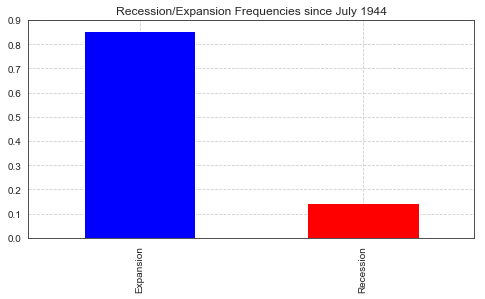

In [7]:
mapper={0:"Expansion",1:"Recession"}
classes=target.map(mapper)

(classes.value_counts()/len(classes)).plot(kind='bar',color=["b","red"],grid=True,legend=False,
                            figsize=(8,4))
plt.title('Recession/Expansion Frequencies since July 1944')
plt.grid(linestyle="--")
plt.savefig('Pictures/Rec_from1944.png')

## 2.2 Feature Engeneering<a name="engeneering"></a>

### 2.2.1 Transforming the Original Features:

Now that we uploaded our raw dataset, the time series must be transformed and processed to obtain features that can be informative and used inside a ML algorithm. 

Same features appear in level but we are more interested in the momentum they shows in a run-up to a recession.
As a result, the following features are transformed as described here below:

- __real_dvd__: 6 months and 3 months % change;
- __real_earn__: 6 months and 3 months % change; 
- __ind_prod__: 6 months and 3 months % change;
- __man_cap_ut__: 6 months and 3 months absolute change;
- __pers_sav_disp_inc__: : 6 months and 3 months absolute change;
- __unempl__: : 6 months and 3 months absolute change; and
- __cpi_index__: 12 months % change.

Then, once the transformation occurred, the original variables are dropped form the database since they are either non-stationary or because the series in level bear little or no economic significance by themself. The variable __ism pmi__ is also transformed using the 6 months and 3 months absolute change, but we also retain it in level as it conveys economic informations, since when its value exceeds 50 it suggests an economic expansions while below hints a contractions.

- __ism_pmi__: in level along with 6 months and 3 months absolute change.

As for the variables related to the yield of long and short term US government bonds, we calculate the slope of the yield curve as the difference of the yield of a 10 years Treasury bond and a 3 months US Bills. The new variable is then stored as __slope__ and is considered in levels along with the 6 months and 3 months change. 

- __slope__: 10 years Treasury bond - 3 months Bill int. rates, in levels, 3 months and 6 months change.

Enventually the new feature "__real_rate__" is created as the difference between the 3 months US Bills interest rate and the 12 months inflation rate. Again, the feature will be considered in levels and in its 6 months and 3 months change.

- __real_rate__: 3 months treasury int. rates - 12 Months inflation rate, in levels and 3 months and 6 months change.

In order to carry out the transformations enumerated here above we split the original dataframe "features", grouping together the varaibles that go through the same transformations or partecipate to create the specific feature as "slope". Once all the operations are concluded the the new features are merged back together. The new dataframe is named: __feature_1__.   

* Slope and Real Rate Related Features:

In [8]:
# A new DataFrame including only the three feature ["10_yrs_rt","3_mth_rt","cpi_index"] is created
df_slope=features.loc[:,["10_yrs_rt","3_mth_rt","cpi_index"]]
# First the features slope is created
df_slope["slope"]=df_slope["10_yrs_rt"]-df_slope["3_mth_rt"]
# Then the 3 months change of the "slope" is added 
df_slope["d_slope_3m "]=df_slope["slope"].diff(3)
# Eventually the 6 months change of the "slope" is added 
df_slope["d_slope_6m "]=df_slope["slope"].diff(6)
# the feature "cpi" is created:
df_slope["cpi"]=df_slope["cpi_index"].pct_change(12).mul(100)
# the feature "real_rate" is generated with its 3 and 6 months changes:
df_slope["real_rate"]=df_slope["3_mth_rt"]-df_slope["cpi"]
df_slope["d_rr_3m"]=df_slope["real_rate"].diff(3)
df_slope["d_rr_6m"]=df_slope["real_rate"].diff(6)
df_slope.drop(["10_yrs_rt","3_mth_rt","cpi_index","cpi"],axis=1,inplace=True)

* Features going through 3 Months and 6 Months % change, original vatiables are then dropped:

In [9]:
# Create a new DataFrame:
df_pctch=features.loc[:,["real_dvd","real_earn","ind_prod"]]
list_f=df_pctch.columns.tolist()
# Generate the 3 Months and 6 Months % changes 
for i in list_f:
    df_pctch[str(i+"_6m")]=df_pctch[i].pct_change(6).mul(100)
    df_pctch[str(i+"_3m")]=df_pctch[i].pct_change(3).mul(100)
# Now the original features are dropped since we won't use them anymore:
df_pctch.drop(list_f,axis=1,inplace=True);

* Features (pers_sav_disp_inc, unempl, cpi_index and ism_pmi) to be transformed in 3 and 6 months value changes and computing these values, the original vatiables are dropped. Only the ism_pmi is retained:

In [10]:
# Create a new DataFrame:
df_absch=features.loc[:,["pers_sav_disp_inc","unempl","man_cap_ut","ism_pmi"]]
list_f=df_absch.columns.tolist()
# Generate the 3 Months and 6 Months value changes 
for i in list_f:
    df_absch[str(i+"_6m")]=df_absch[i].diff(6)
    df_absch[str(i+"_3m")]=df_absch[i].diff(3)
# Now the original features are dropped since we won't use them anymore:
list_f.remove("ism_pmi")
df_absch.drop(list_f,axis=1,inplace=True)

* Now the three dataframes are merged back together:

In [11]:
feature_1=pd.concat([df_slope, df_pctch, df_absch],axis=1,ignore_index=False)
print('Dataset shape: {}\n'.format(feature_1.shape))
feature_1.info()

Dataset shape: (901, 21)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 901 entries, 1944-07-31 to 2019-07-31
Data columns (total 21 columns):
slope                   901 non-null float64
d_slope_3m              898 non-null float64
d_slope_6m              895 non-null float64
real_rate               889 non-null float64
d_rr_3m                 886 non-null float64
d_rr_6m                 883 non-null float64
real_dvd_6m             895 non-null float64
real_dvd_3m             898 non-null float64
real_earn_6m            895 non-null float64
real_earn_3m            898 non-null float64
ind_prod_6m             895 non-null float64
ind_prod_3m             898 non-null float64
ism_pmi                 859 non-null float64
pers_sav_disp_inc_6m    863 non-null float64
pers_sav_disp_inc_3m    866 non-null float64
unempl_6m               853 non-null float64
unempl_3m               856 non-null float64
man_cap_ut_6m           853 non-null float64
man_cap_ut_3m           856 non-null flo

At this stege, we are dealing with 21 features. We quickly explore our features dataframe using the 'describe()' attribute:

In [12]:
feature_1.describe().T

,count,mean,std,min,25%,50%,75%,max
slope,901.0,1.467714e+00,1.102485,-2.650000,0.690000,1.410000,2.250000,4.420000
d_slope_3m,898.0,-6.915367e-03,0.611140,-3.890000,-0.260000,-0.040000,0.210000,5.160000
d_slope_6m,895.0,-1.299441e-02,0.845974,-5.360000,-0.420000,-0.080000,0.350000,4.730000
real_rate,889.0,2.755481e-01,3.211734,-19.292131,-0.989515,0.741787,2.134211,6.781146
d_rr_3m,886.0,7.844193e-03,1.362069,-9.392265,-0.520738,0.027501,0.536641,7.362240
d_rr_6m,883.0,1.627160e-02,2.136146,-14.816951,-0.660172,-0.005375,0.775208,10.467674
real_dvd_6m,895.0,1.284181e+00,3.765026,-13.634974,-0.723499,1.004228,3.297997,16.627817
real_dvd_3m,898.0,6.277493e-01,2.092772,-8.675185,-0.483484,0.559128,1.699012,10.981098
real_earn_6m,895.0,4.437368e+00,37.896082,-84.648386,-3.562637,2.148557,7.478187,577.727784
real_earn_3m,898.0,1.608364e+00,16.823266,-66.293602,-1.815022,1.110421,3.778764,306.545209


From a quick inspection of the data, it looks like that the 6 months and 3 months changes of Real Earning exhibit some extreme value in their min and max. We try to explore this features graphically:

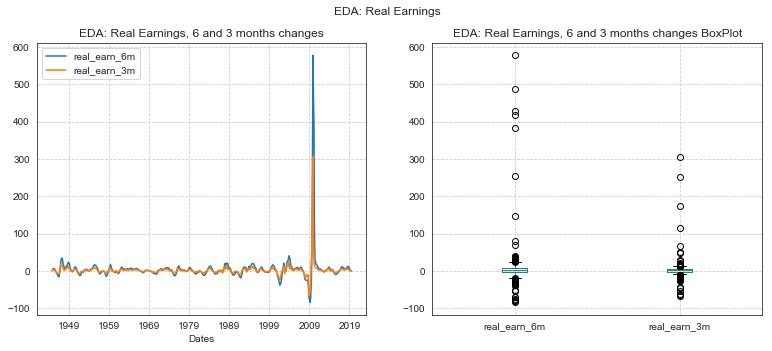

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,5))
df_pctch.loc[:,['real_earn_6m','real_earn_3m']].plot(grid=True,ax=ax1); #,figsize=(10,5)
ax1.grid(linestyle="--");
ax1.set_title("EDA: Real Earnings, 6 and 3 months changes");
#plt.show()
df_pctch.loc[:,['real_earn_6m','real_earn_3m']].boxplot(grid=True,ax=ax2); # figsize=(10,5),
ax2.grid(linestyle="--");
ax2.set_title("EDA: Real Earnings, 6 and 3 months changes BoxPlot")
fig.suptitle('EDA: Real Earnings');
fig.savefig('Pictures/EDA_RealEarn.png')

As expected, the two features related to Earnings seems to display some extreme values (+577% and -84% for instance in  ___"real earn 6m"___). It turns out that these values are related to the GFC. These figures are real and not due to some "reading errors" and are due to the extreme severity of the 2008 crisis.
  
Before proceeding any further it might be useful to take a look at the magnitude of the other data we are using. This is achieved by producing a boxplot of the features. For the sake of clarity the dataset is split in two batches of 10 and 9 feature. The variables related to real earnings are dropped as we already explored them.  

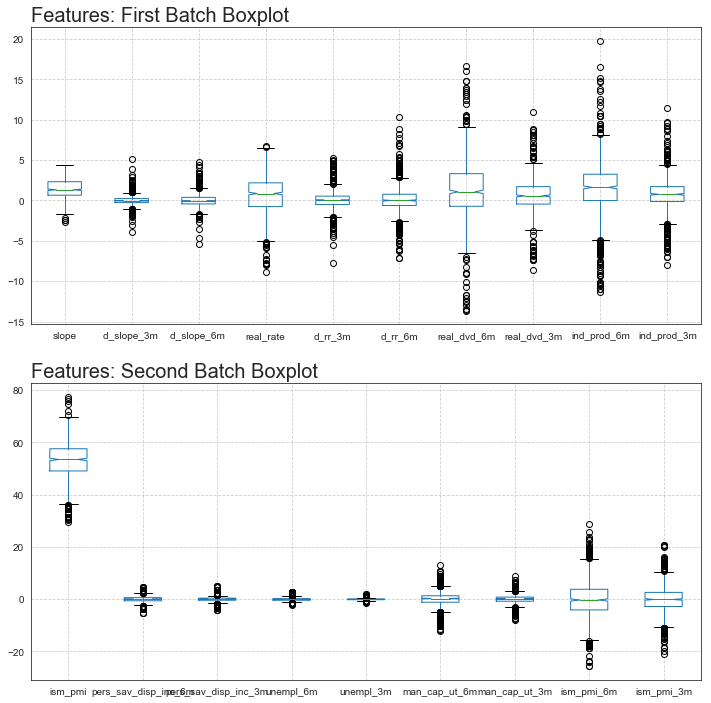

In [14]:
# We make a copy of the feature_1 dataset in order to not work on the original data:
box=feature_1.dropna().copy()
box=box.drop(['real_earn_6m','real_earn_3m'],axis=1)
# split dataset in two batches
b_1=list(range(0,10))
b_2=list(range(10,19))
box_1=box.iloc[:,b_1]
box_2=box.iloc[:,b_2]
# Create the Graph:
fig, axarr = plt.subplots(2, 1, figsize=(12, 12))
box_1.boxplot(ax=axarr[0],notch = True);
axarr[0].grid(linestyle='--')
axarr[0].set_title("Features: First Batch Boxplot",loc="left",fontdict={'fontsize':20});

box_2.boxplot(ax=axarr[1],notch = True);
axarr[1].grid(linestyle='--')
axarr[1].set_title("Features: Second Batch Boxplot",loc="left",fontdict={'fontsize':20});

fig.savefig('Pictures/feat_boxplot.png')

One particular caratheristic of our data according to the graphs above is the wide presence of outliers in all the time series.

### 2.2.2 Variables' Lags range

The set of feature created is the one we will use for the analysis. However, since our goal is to anticipate the event of a recession at least three months in advance, we will consider these variables with lags ranging for 3 up to 12 months. Since we don't want lose data we will replace the time index, extending it up to 12 months in the future. Overall, since we have 21 original features, this implies to deal with a dataset of 210 features.

* Create a new index. Since our date index ends on June 2019, by shifting some featuresome value would be deleted. By expanding our time index they would just move forward in the future.

In [15]:
# Create a new index in order to not loose data by sifting them forward:
new_index=pd.date_range(start='31/07/1944', end='30/07/2020', freq='M')
feature_1=feature_1.reindex(new_index)
#feature_1.info()

* After creating the lags range and a list of the features' names, first a dictionary with the lagged feature is created and then transformed into a DataFrame. The New features Dataframe is named __"features_2"__

In [16]:
# define number of lags:
lags=list(range(3,13)) # 13 as in Python the final number of a range is not considered
# define suffixes:#suf=["l"+str(a) for a in lags]#suf=["l%a" %a for a in lags]
name_features=feature_1.columns
list_f1=list(name_features)
# Create a dictionary with the lagged features
feature_dict={a+"_"+"l{}".format(b) : feature_1[a].shift(b) for a in list_f1 for b in lags}
# Convert into a DataFrame for subsequent use
features_2 = pd.DataFrame(feature_dict)
feature_names=features_2.columns
features_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 912 entries, 1944-07-31 to 2020-06-30
Freq: M
Columns: 210 entries, slope_l3 to ism_pmi_3m_l12
dtypes: float64(210)
memory usage: 1.5 MB


## 2.3 Exploratory Data Analysis (EDA)<a name="EDA"></a>:

So far we created our dataset of features. Overall we generated 210 features out from the original 10. This is the result of the original series transformation first in percentage change and value change over 3 and 6 months and then by applying lags ranging from 3 to 12 months. Now as first step we need to split our dataset in training and test datasets. Our EDA will consider only the former in order to not allow the latter to influence the feature selection process.

#### Training and Test Dataset
Starting from 21 original variables as we apply 10 lags ranging from 3 up to 12 periods. As a result, we obtain 210 features. Therefore, the variables will be analyzed in group o ten. The data from now on will be split between train and test dataset. Once the "nan" are removed, the dataset ranges from 1948 to 2019. We set aside 20% of the dataset as test data. This means about 14 years (168 months) of data of the original 71 (852 months). 

In [17]:
# features and target variables a merged back togheter. Target index is extended to match the feature's one. 
# split data between train and test data:
X_train=features_2.dropna().iloc[:673,:]
X_test=features_2.dropna().iloc[673:-3,:] # The -3 is to exclude the last three obs as we lagged al the variables of three periods
X_test_ext=features_2.dropna().iloc[673:,:]
y_train=target.reindex(X_train.index)
y_test=target.reindex(X_test.index)
# Check that test and train environment is coincident for X and y dataset:
print("Verify that train and test for target and features has the same size:\n X_train size: {}; y_train size: {} \
       \n X_test size: {}; y_test size: {}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

print("\n Check if X and y index are the same for train and test environment:\n Train: {} \n Test: {}"\
      .format((X_train.index==y_train.index).all(),(X_test.index==y_test.index).all()))

Verify that train and test for target and features has the same size:
 X_train size: (673, 210); y_train size: (673,)        
 X_test size: (168, 210); y_test size: (168,)

 Check if X and y index are the same for train and test environment:
 Train: True 
 Test: True


The last line checked if the indeces of the training and test dataset are corresponding between the Target and the Features. 

---
__NOTE: ONLY TRAINING DATA ARE USED FROM NOW ON__  
Data leakage is one of the major problems affecting ML. While reading Andreas C. Müller & Sarah Guido's excellent book, _Introduction to Machine Learning with Python_, I got some brilliant insight on how easy is to leak information from the train to the test dataset. Sometimes it might be the unintended result of data transformation or pre-processing. On these basis, from now on, we will use only the train datasets. Test dataset will be re-introduced only at the very end. In order to avoid confusion, in any further split of the dataset, the set of data used to control the generalization proprieties of a model will be named as "validation". From a time standpoint, we are going back to July 2005 and there our information set ends!

---
To carry out the EDA, we create a specific dataframe, "_eda feat_". In this way the original data will not be affected if need to apply some transformation:

In [18]:
eda_feat=pd.concat([y_train, X_train],axis=1,ignore_index=False)
print("Shape of the EDA dataset: {}".format(eda_feat.shape))

Shape of the EDA dataset: (673, 211)


## 2.3 EDA - Exploratory Data Analysis<a name="EDA"></a>

### 2.3.1 EDA: Time Series BoxPlot Analysis

As a first step of our EDA we compare the Boxplot of all the features we generated. The box plots generated are grouped by 10 in 21 buckets, according to the original features they are generated from: 21 original features lagged for periods ranging from 3 to 12 (10 in total). For each feature two boxplot are produced: in <font color=blue>__blue__<font color=black> are plotted the observations recorded during the expansionary phases of the business cycle while in <font color=red>__red__<font color=black> those recorded during the contractionary phases.
    
A first important information we can obtain from this preliminary analysis is if a feature display significant different statistical caratheristics between the two phases of the business cycle. 
    
Overall we will produce 210 boxplots. In order to not overload this article with graphs, we pick those that look more promising:
1. Slope;
1. Unemployment change over three months;
1. ISM-PMI in levels
    
__Slope__: The Slope variable seems to show a distinct distribution when we consider lags above 8 months up to 12 months. The yield curve is significantly more flat in a period (8-12 months before) preceeding a recession (Fig. X);  
__Unemployment change over three months__: In a 3 to 4 months run-up period to a recession, unemployment exibith a signinficant trend to spike up in a way that is not consisten with booming years (Fig. X);      
__ISM-PMI in levels__: The ISM index seems to print values significantly below the normal values observed during the booming years 3 to 4 months in advance of a recession (Fig. X).


In [ ]:
# Create list of features names
names=list(eda_feat.columns)
# Graph general framework
sns.set_style("white")
# iterators for initial and final feature for each bucket: 
var_iter_start=[a for a in range(1,211,10)]
var_iter_end=[a for a in range(11,221,10)]
# loop to create batches of 10 graphs each
for star, end in zip(var_iter_start,var_iter_end):
    fig, ax = plt.subplots(nrows=2,ncols= 5,figsize = (17, 12))
    ax = ax.ravel()
    for a, name in zip(ax,list(range(star,end))):
        recession = eda_feat[eda_feat["Recession"]==1][names[name]].dropna()
        espansion = eda_feat[eda_feat["Recession"]==0][names[name]].dropna()
        boxplots = a.boxplot([recession,espansion],
                   notch = True,
                   labels=['Rec', 'Exp'],
                   widths = .7,
                   patch_artist=True,
                   medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                   boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4));

        boxplot1 = boxplots['boxes'][0]
        boxplot1.set_facecolor('red')
        a.set_title("{}:median={:.2f}-R;{:.2f}-E".format(names[name],recession.median(),espansion.median()),fontsize=10)
        a.grid(linestyle="--");

    fig.suptitle('\n BoxPlot for lagged values of {}: from 07-1949 to 05-2005'.format(name_features[round(end/10-1.1)]), fontsize=16);
    fig.savefig('Pictures/boxplots/Boxplot_{}.png'.format(name_features[round(end/10-1.1)]))

### 2.3.2 EDA: Correlations

Since we are dealing with a set of teime series equal to 210, plotting the whole 210x210 matrix is of no help. Therefore we focus the analysis on the correlation of each of the feature with the Target. First we group the lagged features according to the variable they are derived from (for instance all the lagged variable fo 'slope' or 'ism_pmi'), then the correlation with the Target variable is computed and eventually each group of variables is sorted from the feature with the highest correlation to the one with the lowest. 

In [ ]:
import myfunc_II as mf
# initialize subplots:
fig, axs = plt.subplots(nrows=7,ncols=3,figsize = (16, 30));
axs = axs.ravel();
a=eda_feat.iloc[:,0]
# Loop to create graphs:
for ax, name in zip(axs,list(range(len(name_features)+1))):
    b=eda_feat.iloc[:,list(range(name*10+1,name*10+11))]
    df_corr=pd.concat([a, b],axis=1,ignore_index=False)
    mf.corr_to_target_multi(df_corr, 'Recession',
                            title='Lagged {} Features - Corr to Target'.format(name_features[name]),
                            file=None, ax=ax, fontsize=10);
    fig.suptitle('EDA: Features Correlation vs Target',fontsize=20,y=1.02);
    fig.tight_layout();
    fig.savefig('Pictures/correlation_graph.png')

The correlation analysis confirms what we noticed from the boxplots analysis. Some variables such as Slope for lags above 8, and ISM, Capacity Utilization  and Industrial production for lags below 5, have the highest correlation score in absolute terms. Overall none of the features considered has a very high correlation, however it is possible that some combination or the interaction of two or more variables among themself might help to classify and foresee recession. In order to test this possibility we first shortlist the variables with the highest absolute correlation with the Target (avoiding feauture from the same group) and then we plot their distribution during booming and recession years.   

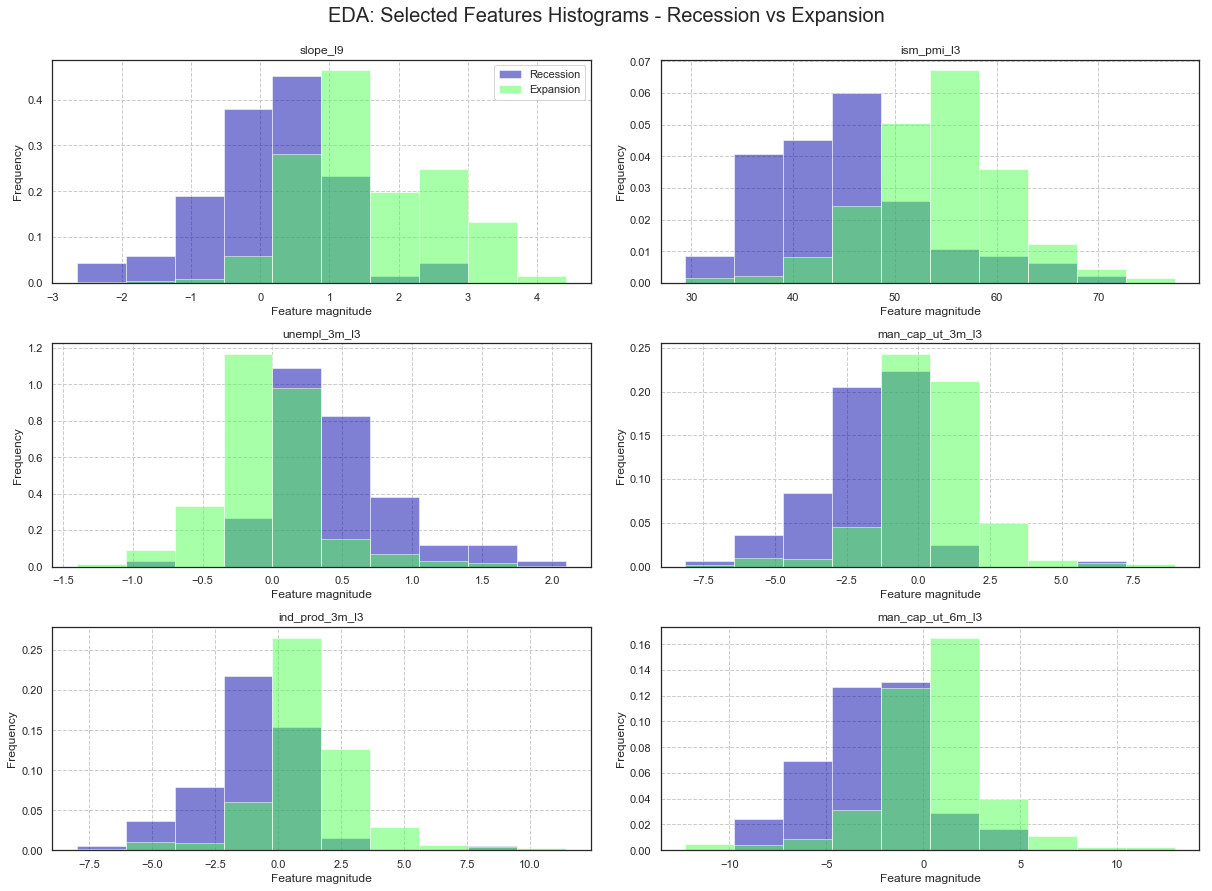

In [21]:
import mglearn
# Sort features according to their abs. correlation with the target:
top_val=eda_feat.corr()[["Recession"]].abs().sort_values("Recession",ascending=False)[1:]
# drop features from the same group:
top_corr_var=top_val.drop(['slope_l10', 'slope_l8', 'slope_l7','slope_l11', 'slope_l12','slope_l6','slope_l5'],axis=0)
list_top=list(top_corr_var[:6].index)
list_top=list_top+["Recession"]
# Create the distribution histogram for each variable 
top_df=eda_feat.loc[:,list_top]
sns.set_style("white")
fig, axes = plt.subplots(3, 2, figsize=(17, 12))
recession = top_df[top_df.Recession == 1]
expansion = top_df[top_df.Recession == 0]
#fig.suptitle('Feature Distribution differentiating for Expansion and Recession Years')
ax = axes.ravel()
for i in range(6):
    _, bins = np.histogram(top_df.iloc[:, i], bins=10)
    ax[i].hist(recession.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5,density=True)
    ax[i].hist(expansion.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5,density=True)
    ax[i].set_title(list_top[i])
    #ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].grid(True,linestyle='--')
ax[0].legend(["Recession", "Expansion"], loc="best")
fig.tight_layout();
fig.suptitle("EDA: Selected Features Histograms - Recession vs Expansion", y=1.03,fontsize=20)
fig.savefig('Pictures/Distribution_6_graph.png')

Although readings associated to recessions and those related to expansionary years seems to have different distributions for most of the features selected, none of them offers a clear cut classification of formers from the latters. Indeed, for most of the variables, we can notice a great deal of overlapping observations in the distribution of the readings during recessions and expansions.

### 2.3.3 EDA: Pairplots
However, as it was mentioned before, interactions between variables can be be of great help in achieving our classification goal. In order to explore this possibility in a very simplified manner, we consider the pair-plots between the 6 features shortlisted before. In the graph-matrix below, each graph outside the main diagnal rapresents the a scatter plot between the selected features taken two by two. Reading related to a recession are marked in red while those related to expansion period in blue. This rappresentation is somewhat conforting: the spatial locations of observations related to recession and those to expansions seem to be decently outlined and defined. This bodes well for future analysis since the ability to identify these areas fall well within the reach of machine learning algorithms.

C:\Users\fabrizioxueling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


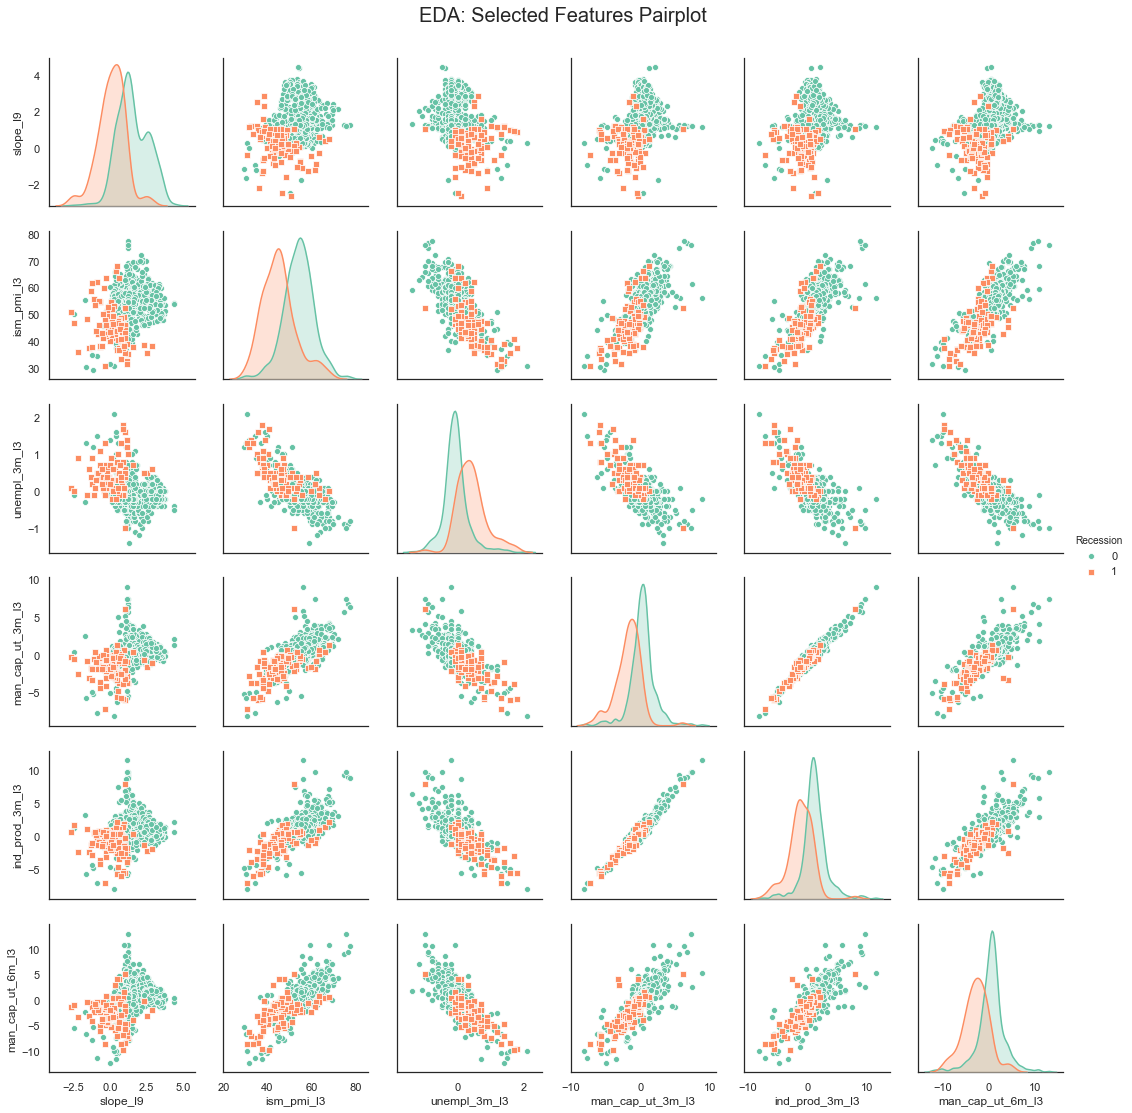

In [22]:
fig=sns.pairplot(top_df, kind="scatter", hue="Recession",vars=['slope_l9','ism_pmi_l3','unempl_3m_l3',
                                                           'man_cap_ut_3m_l3','ind_prod_3m_l3',
                                                           'man_cap_ut_6m_l3'],markers=["o", "s"], palette="Set2");
fig.fig.suptitle("EDA: Selected Features Pairplot", y=1.03,fontsize=20)
fig.savefig('Pictures/Pairplot.png')

## 2.4 Conclusion<a name="Conc"></a>

Data cleaning and feature engeneering are necessary steps required to allow ML models to express their full potential. The uploaded data were already clean and only minor interventions on the DataTime index have been required. With regards to feature engeneering, started from our original set of features, ten in total, and after a series of transformation and considering a set of lags for each of them we ended up with a set of 210 features.
Exploratory Data Analysis aims to get a first gauge of data ability to explain the target variable we are studing. Overall the selected features for the analysis seem to have a decent power to classify if a specific period belongs to a recessionary phase or to and expansionary one. Their abilility seems to increase when the features interaction among themself is taken into account. During the EDA we analyzed only the interaction of 6 features takes 2 by 2 and the results bode well for future analysis. However our training database is made of 210 features for 673 observations. The resulting model would result as overly complex in particular in relation to the size of out dataset. This bring about the next step of our study: __Feature Selection__.   

[Go to the top](#tol1)

--> __This section is for internal use only__ <--

In [23]:
# Save the dataset:
X_train.to_csv("Saved Data/X_train_data.csv")
X_test.to_csv("Saved Data/X_test_data.csv")
X_test_ext.to_csv("Saved Data/X_test_ext_data.csv")
y_train.to_csv("Saved Data/y_train_data.csv",header=True)
y_test.to_csv("Saved Data/y_test_data.csv",header=True)